Created by Dridi Mohamed & Kallala Youssef 
#### `Column Descriptions`  
- `id`: Unique id for each patient  
- `age`: Age of the patient in years  
- `origin`: Place of study  
- `sex`: Male/Female  
- `cp`: Chest pain type  
  - 1. Typical angina  
  - 2. Atypical angina  
  - 3. Non-anginal  
  - 4. Asymptomatic  
- `trestbps`: Resting blood pressure (in mm Hg on admission to the hospital)  
- `chol`: Serum cholesterol in mg/dl  
- `fbs`: Fasting blood sugar > 120 mg/dl (True/False)  
- `restecg`: Resting electrocardiographic results  
  - **Values**: [normal, stt abnormality, lv hypertrophy]  
- `thalach`: Maximum heart rate achieved  
- `exang`: Exercise-induced angina (True/False)  
- `oldpeak`: ST depression induced by exercise relative to rest  
- `slope`: Slope of the peak exercise ST segment  
- `ca`: Number of major vessels (0-3) colored by fluoroscopy  
- `thal`: [normal, fixed defect, reversible defect]  
- `num`: Predicted attribute  

<a id="contents_table"></a>  
### Table of Contents  
<span style="color:green; font-size: 200%; font-weight: bold;">Steps</span>  

- [Step 1 | Import Libraries](#import)  
- [Step 2 | Read Dataset](#read)  
- [Step 3 | Dataset Overview](#overview)  
- [Step 4 | EDA](#EDA)  
- [Step 5 | Missing Values](#miss)  
- [Step 6 | Outliers](#outliers)  
- [Step 7 | Machine Learning](#ml)  

<a id="import"></a>
# <p style="background-color:green ; font-family:calibri; color:white; font-size:125%; text-align:center; border-radius:0px 0px;">Step 1 | Import Libraries</p>


Let's start the project by importing all the libraries that we will need in this project.


In [1]:
# import libraries

# 1. to handle the data
import pandas as pd
import numpy as np
from scipy import stats

# to visualize the data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


# To preprocess the data
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder,OneHotEncoder
from sklearn.impute import SimpleImputer, KNNImputer
# import iterative imputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

# machine learning
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
#for classification tasks
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
# pipeline
from sklearn.pipeline import Pipeline
# metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, mean_absolute_error,mean_squared_error,r2_score
from scipy.stats import ttest_ind
from scipy.stats import chi2_contingency
from scipy.stats import f_oneway
import statsmodels.api as sm
from statsmodels.formula.api import ols

# ignore warnings   
import warnings
warnings.filterwarnings('ignore')

<a id="blue"></a>
# <p style="background-color:green ; font-family:calibri; color:white; font-size:125%; text-align:center; border-radius:0px 0px;">Step 2 | Read Dataset</p>

In [2]:
# load the data from csv file placed locally in our pc
df = pd.read_csv(r'C:\Users\ASUS-PC\Desktop\Data analysis Project\Data-Analysis-Project\heart_disease_uci.csv')

# print the first 5 rows of the dataframe
df.head()

,id,age,sex,dataset,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<span style="color: green; font-size: 250%; font-weight: bold;">3.1 Column renaming</span>

In [3]:
# Rename columns
column_rename = {
    'dataset': 'place',
    'id': 'patient_id',
    'age': 'age_years',
    'sex': 'gender',
    'cp': 'chest_pain_type',
    'trestbps': 'resting_bp',
    'chol': 'cholesterol_mg_dl',
    'fbs': 'high_fasting_blood_sugar',
    'restecg': 'resting_ecg_result',
    'thalch': 'max_heart_rate',
    'exang': 'exercise_induced_angina',
    'oldpeak': 'st_depression',
    'slope': 'st_slope',
    'ca': 'num_major_vessels',
    'thal': 'thalassemia',
    'num': 'heart_disease'
}
df = df.rename(columns=column_rename)
# Confirm it's changed
print(df.columns)



Index(['patient_id', 'age_years', 'gender', 'place', 'chest_pain_type',
       'resting_bp', 'cholesterol_mg_dl', 'high_fasting_blood_sugar',
       'resting_ecg_result', 'max_heart_rate', 'exercise_induced_angina',
       'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia',
       'heart_disease'],
      dtype='object')


In [4]:
categorical_cols = df.select_dtypes(include='object').columns.tolist()
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numeric_cols}')

Categorical Columns: ['gender', 'place', 'chest_pain_type', 'high_fasting_blood_sugar', 'resting_ecg_result', 'exercise_induced_angina', 'st_slope', 'thalassemia']
Numerical Columns: ['patient_id', 'age_years', 'resting_bp', 'cholesterol_mg_dl', 'max_heart_rate', 'st_depression', 'num_major_vessels', 'heart_disease']


In [5]:
df.drop(['patient_id'], axis=1, inplace=True)


In [6]:
df.shape

(920, 15)

<a id="overview"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:125%; text-align:center; ;">Step 3 | Data Overview </p>


<span style="color: green; font-size: 250%; font-weight: bold;">3.1 | Dataset Basic Information</span>

In [7]:
# exploring the datatype of each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age_years                 920 non-null    int64  
 1   gender                    920 non-null    object 
 2   place                     920 non-null    object 
 3   chest_pain_type           920 non-null    object 
 4   resting_bp                861 non-null    float64
 5   cholesterol_mg_dl         890 non-null    float64
 6   high_fasting_blood_sugar  830 non-null    object 
 7   resting_ecg_result        918 non-null    object 
 8   max_heart_rate            865 non-null    float64
 9   exercise_induced_angina   865 non-null    object 
 10  st_depression             858 non-null    float64
 11  st_slope                  611 non-null    object 
 12  num_major_vessels         309 non-null    float64
 13  thalassemia               434 non-null    object 
 14  heart_dise


>* ***Row and columns :*** In dataset `920`Rows(entries)  and `16` columns
>* ***Data Type :*** Here `3` columns **int64** data type , `5` columns **float64** and `8` columns **object**
>* ***Null Values :*** Here are null values in `10` columns  

<span style="color: green; font-size: 250%; font-weight: bold;">3.2 | Separate Columns with Dtype</span>


In [8]:

# find only categorical columns
categorical_cols = df.select_dtypes(include='object').columns.tolist()
# find only numerical columns
numeric_cols = df.select_dtypes(exclude='object').columns.tolist()

print(f'Categorical Columns: {categorical_cols}')
print(f'Numerical Columns: {numeric_cols}')


Categorical Columns: ['gender', 'place', 'chest_pain_type', 'high_fasting_blood_sugar', 'resting_ecg_result', 'exercise_induced_angina', 'st_slope', 'thalassemia']
Numerical Columns: ['age_years', 'resting_bp', 'cholesterol_mg_dl', 'max_heart_rate', 'st_depression', 'num_major_vessels', 'heart_disease']


In [9]:
categorical_columns = ['thal', 'ca', 'slope', 'exang', 'restecg','fbs', 'cp', 'sex', 'num']
bool_cols = ['fbs', 'exang']
numerical_columns = ['oldpeak', 'thalch', 'chol', 'trestbps', 'age']

>* ***Categorical Columns :*** `sex , dataset , cp , fbs , restecg , exang , slope , thal`
>* ***boolean_columns :*** `fbs , exang`
>* ***Numerical Columns :*** `id , age , trestbps , chol , thach , oldpeak , ca , num`


<a id="EDA"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:100%; text-align:center; ;">Step 4 | Explore All Columns</p>

>* Now, gain information of columns column by column


It is composed of 14 attributes which are age, sex, chest pain type, resting blood pressure, serum cholesterol, fasting blood sugar, resting electrocardiographic results, maximum heart rate achieved, exercise-induced angina, oldpeak — ST depression induced by exercise relative to rest, the slope of the peak exercise ST segment, number of major vessels and Thalassemia. 

<span style="color: green; font-size: 250%; font-weight: bold;">4.1 | Age_years Column</span>

minimun age is : 28
maximun age is : 77
average of age is : 53.51


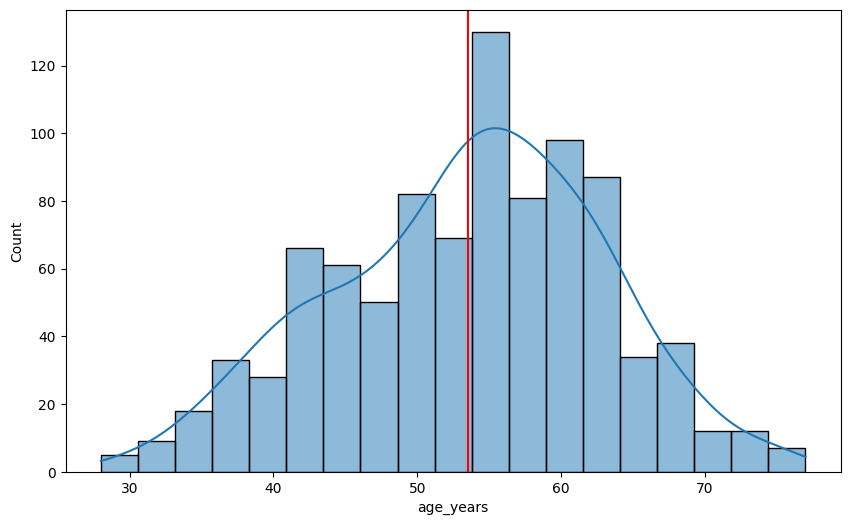

In [10]:
# check minimum age 
print("minimun age is :",df['age_years'].min())
# check maximum
print("maximun age is :",df['age_years'].max())
# check average of age
print("average of age is :",df['age_years'].mean().round(2))
# plot the mean of age column using sns
plt.figure(figsize=(10,6))
sns.histplot(df['age_years'], kde=True)
plt.axvline(df['age_years'].mean(), color='red')

>* The minimum age to have a heart disease starts from `28` years old and maximum `77` year old.
>* The average of age in the people is `53.51%`  



<span style="color: green; font-size: 250%; font-weight: bold;">4.2 | Gender Column</span>

In [11]:
print("count of male & female",df['gender'].value_counts())
male_count = 563
female_count = 182
total_count = male_count + female_count

# calculate percentages
male_percentage = (male_count / total_count) * 100
female_percentage = (female_count / total_count) * 100

# display the results
print(f"Male percentage in the data: {male_percentage:.2f}%")
print(f"Female Percentage in the data: {female_percentage:.2f}%")

count of male & female gender
Male      726
Female    194
Name: count, dtype: int64
Male percentage in the data: 75.57%
Female Percentage in the data: 24.43%


>* Males are(`726`) and percentage in the data is: ***`75.57%`***

>* Females are(`194`)Percentage in the data is: ***`24.43%`***

<span style="color: green; font-size: 250%; font-weight: bold;">4.3 | Dataset Column</span>

In [12]:
print("Data collect from :",df['place'].value_counts())
# print the values count of dataset column grouped by sex
print(df.groupby('gender')['place'].value_counts())
# barplot of dataset  base on sex
fig = px.bar(df, x='place', color='gender')
fig.show()


Data collect from : place
Cleveland        304
Hungary          293
VA Long Beach    200
Switzerland      123
Name: count, dtype: int64
gender  place        
Female  Cleveland         97
        Hungary           81
        Switzerland       10
        VA Long Beach      6
Male    Hungary          212
        Cleveland        207
        VA Long Beach    194
        Switzerland      113
Name: count, dtype: int64


>* The data from ***`Cleveland , Hungary ,Switzerland,and VA Long Beach`***
>* There highest number of people from Cleveland (`304`) and lowest from Switzerland (`123`)
>* The highest number of females in this dataset are from `Cleveland` (`97`) and lowest from VA Long Beach (`6`)
>* The highest number of males in this dataset are from Hungary (`212`) and lowest from Switzerland (`113`).


<span style="color: green; font-size: 250%; font-weight: bold;">4.4 | Chest Pain Column</span>

In [13]:
plt.figure(figsize=(10,6))
# value count of cp column
print("value_counts of :",df['chest_pain_type'].value_counts())
# count plot of cp column by sex column
fig = px.histogram(df, x='chest_pain_type', color='gender', barmode='group')
fig.show()

value_counts of : chest_pain_type
asymptomatic       496
non-anginal        204
atypical angina    174
typical angina      46
Name: count, dtype: int64


<Figure size 1000x600 with 0 Axes>

>* There `36` males and and `10` females who have  `Typical Angina` pain
>* There `426` males and and `70` females who have  `asymptomatic` pain
>* There `151` males and and `53` females who have  `non-anginal` pain
>* There `113` males and and `61` females who have  `atypical Angina` pain.

In [14]:
# count plot of cp column by dataset columnplt
fig = px.histogram(df, x='chest_pain_type', color='place', barmode='group')
fig.show()

>* ***`typical angina`*** pain in ***`Cleveland`*** is to ***`23`*** people
>* ***`typical angina`*** pain in ***`Hungry`*** is to ***`11`*** people
>* ***`typical angina`*** pain in ***`Switzerland`*** is to ***`4`*** people
>* ***`typical angina`*** pain in ***`VA Long Beach`*** is to ***`8`*** people\
................................................................................................................................
>* ***`asymptomatic`*** pain in ***`Cleveland`*** is to ***`144`*** people
>* ***`asymptomatic`*** pain in ***`Hungry`*** is to ***`123`*** people
>* ***`typical angina`*** pain in ***`Switzerland`*** is to ***`98`*** people
>* ***`asymptomatic`*** pain in ***`VA Long Beach`*** is to ***`131`*** people\
................................................................................................................................
>* ***`non-anginal`*** pain in ***`Cleveland`*** is to ***`86`*** people
>* ***`non-anginal`*** pain in ***`Hungry`*** is to ***`54`*** people
>* ***`typical angina`*** pain in ***`Switzerland`*** is to ***`17`*** people
>* ***`non-anginal`*** pain in ***`VA Long Beach`*** is to ***`47`*** people\
................................................................................................................................
>* ***`atypical angina`*** pain in ***`Cleveland`*** is to ***`51`*** people
>* ***`atypical angina`*** pain in ***`Hungry`*** is to ***`105`*** people
>* ***`typical angina`*** pain in ***`Switzerland`*** is to ***`4`*** people
>* ***`atypical angina`*** pain in ***`VA Long Beach`*** is to ***`14`*** people

In [15]:
plt.figure(figsize=(10,6))
# count plot of age column
fig = px.histogram(data_frame=df, x='age_years', color='chest_pain_type')
fig.show()

<Figure size 1000x600 with 0 Axes>

>* ***`typical angina`*** is maximum in the age `62-63` and in age`35.5-37.5` and `69.5-73.5` have no pain
>* ***`asymptomatic`*** is maximum in the age `56-57` and minimum in `30-31`
>* ***`non-anginal`*** is maximum in the age `54-55` and minimum 34-35
>* ***`atypical angina`*** is maximum in the age `54-55` and in age `63.5-65.5`,`67.5-69.5`,`71.5-73.5` have no pain

<span style="color: green; font-size: 250%; font-weight: bold;">4.5 | resting_bp Column</span>

count    861.000000
mean     132.132404
std       19.066070
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_bp, dtype: float64


<Axes: xlabel='resting_bp', ylabel='Count'>

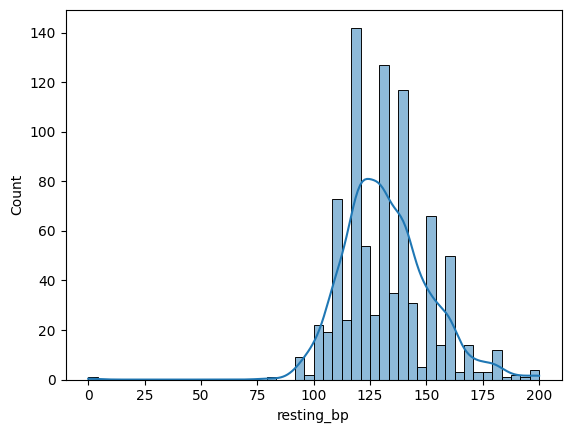

In [16]:
print(df['resting_bp'].describe())
# create a histplot of trestbps column
sns.histplot(df['resting_bp'], kde=True)

>* The average of Blood pressure is `132.132404%` 
>* Minimum blood pressure is `0`
>* Maximum blood pressure is `200` 

<span style="color: green; font-size: 250%; font-weight: bold;">4.6 | Cholesterol Column</span>

count    890.000000
mean     199.130337
std      110.780810
min        0.000000
25%      175.000000
50%      223.000000
75%      268.000000
max      603.000000
Name: cholesterol_mg_dl, dtype: float64


<Axes: xlabel='cholesterol_mg_dl', ylabel='Count'>

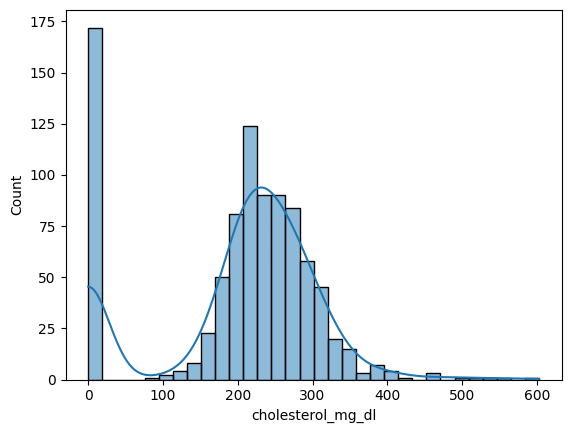

In [17]:
print(df['cholesterol_mg_dl'].describe())

# create a histplot of chol column
sns.histplot(df['cholesterol_mg_dl'], kde=True)

>* The average of Cholestrol is `199.130337%` 
>* Minimum Cholestrol is `0`
>* Maximum Cholestrol is `603` 

<span style="color: green; font-size: 250%; font-weight: bold;">4.7 | Fast blooding sugar Column</span>

>* Fasting blood sugar   is bool column

In [18]:
df['high_fasting_blood_sugar'].value_counts()

high_fasting_blood_sugar
False    692
True     138
Name: count, dtype: int64

In [19]:
fig = px.histogram(df, x='high_fasting_blood_sugar', color='gender', barmode='group')
fig.show()

>* There True values are `138` and False values `692` 
>* There `164` Females have `False` values means no Fasting blood sugar and  `19` Females have `True` value have Fasting Blood sugar
>* There `528` Males have `False` values means no Fasting Blood Sugar and  `119` Males have `True` value have Fasting Blood Sugar


<span style="color: green; font-size: 250%; font-weight: bold;">4.8 | resting_ecg_result Column</span>

In [20]:
# check unique values
df['resting_ecg_result'].unique()

array(['lv hypertrophy', 'normal', 'st-t abnormality', nan], dtype=object)

In [21]:

df['resting_ecg_result'][df['resting_ecg_result'] == 0] = 'normal'
df['resting_ecg_result'][df['resting_ecg_result'] == 1] = 'ST-T wave abnormality'
df['resting_ecg_result'][df['resting_ecg_result'] == 2] = 'left ventricular hypertrophy'

`df['restecg'][df['restecg'] == 0] = "normal"` : This line of code updates the values in the 'restecg' column of the DataFrame df. It selects rows where the value in the 'restecg' column is equal to 0 and sets those values to 'normal'.

`df['restecg'][df['restecg'] == 1] = "ST-T wave abnormality"`: This line of code further updates the 'restecg' column. It selects rows where the value in the 'restecg' column is equal to 1 and sets those values to 'ST-T wave abnormality'.

`df['restecg'][df['restecg'] == 2] = "left ventricular hypertrophy"`: Similarly, this line updates the 'restecg' column. It selects rows where the value in the 'restecg' column is equal to 2 and sets those values to 'left ventricular hypertrophy'.

In [22]:
fig = px.histogram(df, 
                   x='resting_ecg_result', 
                   color='gender', 
                   barmode='group',
                   title='Resting ECG Results by Gender',
                   labels={'resting_ecg_result': 'Resting ECG Result', 'count': 'Number of Patients'})

fig.show()

In [23]:
restecg_counts = df['resting_ecg_result'].value_counts()
print(restecg_counts)

resting_ecg_result
normal              551
lv hypertrophy      188
st-t abnormality    179
Name: count, dtype: int64


In [24]:

# remove row where are found Nan values
df.dropna(subset=['resting_ecg_result'], inplace=True)

We found 
> * `551` ***`normal`***
> * `188` ***`lv hypertrophy`*** 
> * `179` ***`st-t abnormality`***

 
<span style="color: green; font-size: 250%; font-weight: bold;">4.9 | Max_heart_rate Column</span>

In [25]:
df['max_heart_rate'].describe()

count    863.000000
mean     137.528389
std       25.950226
min       60.000000
25%      120.000000
50%      140.000000
75%      157.000000
max      202.000000
Name: max_heart_rate, dtype: float64

In [26]:
# make scatter plot between thalch and age column
px.scatter (df,x='max_heart_rate',y='age_years')


> * Minimum heart rate is `60` in `51` age
> * Maximum heart rate is `202` in `29` age
> * Average of heart rate is `137.528389%`

<span style="color: green; font-size: 250%; font-weight: bold;">4.10 | exercise_induced_angina Column</span>

In [27]:
df['exercise_induced_angina'].value_counts()

exercise_induced_angina
False    526
True     337
Name: count, dtype: int64

In [28]:
plt.figure(figsize=(10,6))

fig = px.histogram(df, x='exercise_induced_angina', color='place', barmode='group')
fig.show()

<Figure size 1000x600 with 0 Axes>

>* There True values are `337` and False values `526`
>* In ***`Cleveland`*** false values are `205` and true values are `99` 
>* In ***`Hungry`*** false values are `202` and true values are `89`
>* In ***`Switzerland`*** false values are `67` and true values are `54`
>* In ***`VA Long Beach`*** false valuesare `52` and true values are `95`


<span style="color: green; font-size: 250%; font-weight: bold;">4.11 | st_depression Column</span>

In [29]:
print(df['st_depression'].describe())


count    856.000000
mean       0.880607
std        1.091840
min       -2.600000
25%        0.000000
50%        0.500000
75%        1.500000
max        6.200000
Name: st_depression, dtype: float64


>* The minimum value of oldpeak is '-2.6' mostly values are zero
>* Maximum value is `6.2`

>* oldpeack values cannnot be negative 
>* we will convert negative to positive values

In [30]:
# Check for negative values
negative_values = df[df['st_depression'] < 0]

# Count of negative values
count_negative_values = len(negative_values)
print(f"Count of negative values: {count_negative_values}")

# Convert negative values to positive
df['st_depression'] = df['st_depression'].abs()

# Now, print the negative values after converting to positive
negative_values_after_conversion = df[df['st_depression'] < 0]
count_negative_values_after_conversion = len(negative_values_after_conversion)

print(f"\nCount of negative values after conversion: {count_negative_values_after_conversion}")

Count of negative values: 12

Count of negative values after conversion: 0


>* Here `12` negative values were converted to positive


<span style="color: green; font-size: 250%; font-weight: bold;"> 4.12 | st_slope
 Column </span>

In [31]:
# value count of slope
df['st_slope'].value_counts()

st_slope
flat           345
upsloping      202
downsloping     63
Name: count, dtype: int64

In [32]:

# Create a histrogram based on 'slope ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='st_slope', color='gender', barmode='group')
fig.show()

>* ***`Downsloping`*** count in ***`Male`*** is `56` is more and in ***`Female`*** is `7`
>* ***`Flat`*** count in ***`Male`*** is `276` is more and in ***`Female`*** is `69`
>* ***`Upsloping`*** count in ***`Male`*** is `145` is more and in ***`Female`*** is `57`

In [33]:
# Create a histrogram based on 'slope ' and 'dataset' using Plotly
fig = px.histogram(data_frame=df, x='st_slope', color='place', barmode='group')
fig.show()

>* ***` Downsloping`*** more  in ***`VA Long Beach`*** is `29`
>* ***`Downsloping`*** less in ***`Hungary`*** is  `1`


>* ***`Flat`***  more in ***`Cleveland`*** is  `140`
>* ***`Flat`***  less in ***`VA Long Beach`*** is  `53`

>* ***`Upsloping`***  less in ***`Cleveland`*** is  `142`
>* ***`Upslopingmore`***  less in ***`Hungry`*** is  `12`


<span style="color: green; font-size: 250%; font-weight: bold;"> 4.13 | num_major_vessels Column</span>

In [34]:
df['num_major_vessels'].value_counts()

num_major_vessels
0.0    181
1.0     67
2.0     41
3.0     20
Name: count, dtype: int64

In [35]:
fig = px.histogram(
    data_frame=df,
    x='st_slope',
    color='place',
    barmode='group',
    color_discrete_sequence=px.colors.qualitative.Set2  # Nice, readable color palette
)

# Update layout for better labels and presentation
fig.update_layout(
    title='Distribution of ST Slope by Dataset Location',
    xaxis_title='ST Slope Type',
    yaxis_title='Count',
    barmode='group'
)

fig.show()

In [36]:
df['num_major_vessels'].describe()

count    309.000000
mean       0.676375
std        0.935653
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        3.000000
Name: num_major_vessels, dtype: float64

>* Minimum value is `0.0`
>* Maximum value is `3.0`
>* The average is `0.676375%`

 
 <span style="color: green; font-size: 250%; font-weight: bold;"> 4.14 | Thalassemia Column</span>



In [37]:
df['thalassemia'].value_counts()


thalassemia
normal               196
reversable defect    192
fixed defect          46
Name: count, dtype: int64

In [38]:
# create a histrogram based on 'thal ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='thalassemia', color='gender', barmode='group')
fig.show()

>* The  male have ***`fixed defect`*** are `42` and female are `4`
>* The  male have ***`normal`*** are `110` and female are `86`
>* The  male have ***`reversable defect`*** are `171` and female are `21`


In [39]:
# create a histrogram based on 'thal ' and 'sex' using Plotly
fig = px.histogram(data_frame=df, x='thalassemia', color='place', barmode='group')
fig.show()

>* The most ***`Fixed Defect`*** values are in `Cleveland` (`18`) and least  ***`Fixed Defect`*** values are in `VA Long Beach` (`8`)
>* The most ***`Normal`*** values are in `Cleveland` (`166`) and least  ***`Normal`*** values are in `VA Long Beach` (`4`)
>* The most ***`Reversable Defect`*** values are in `Hungary` (`117`) and least  ***`Reversable Defect`*** values are in `Cleveland`(`11`)

 
 <span style="color: green; font-size: 250%; font-weight: bold;">4.15 | heart_disease Column</span>
 

> The  `heart_disease` is a target column which is the predicted attribute. We will use this column to predict the heart disease. 
The unique values in this column are: [0, 1, 2, 3, 4], which states that there are 5 types of heart diseases.
* `0 = no heart disease`
* `1 = mild heart disease`
* `2 = moderate heart disease `
* `3 = severe heart disease`
* `4 = critical heart disease `

In [40]:
# unique values in num
print(df['heart_disease'].unique())
# check value count
print(df['heart_disease'].value_counts())

[0 2 1 3 4]
heart_disease
0    411
1    263
2    109
3    107
4     28
Name: count, dtype: int64


>* `0` have `411` number 
>* `1` have `263` number 
>* `2` have `109` number 
>* `3` have `107` number 
>* `4` have `28` number 


<a id="miss"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:125%; text-align:center; ;">Step 5 |Missing Values </p>


<span style="color: green; font-size: 250%; font-weight: bold;">5.1 | Explore Missing Values</span>

In [41]:
# check null values 
null_values=df.isnull().sum().sort_values(ascending=False)
print("null_values:\n",null_values)

null_values:
 num_major_vessels           609
thalassemia                 484
st_slope                    308
high_fasting_blood_sugar     89
st_depression                62
resting_bp                   59
max_heart_rate               55
exercise_induced_angina      55
cholesterol_mg_dl            30
gender                        0
place                         0
chest_pain_type               0
age_years                     0
resting_ecg_result            0
heart_disease                 0
dtype: int64


<span style="color: green; font-size: 125%; font-weight: bold;">Heatmap</span>

<Axes: >

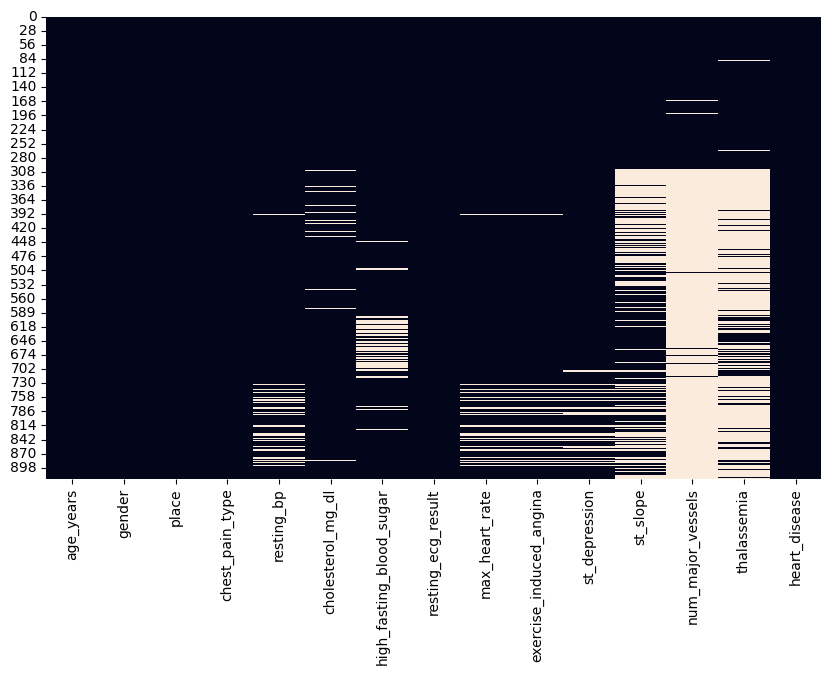

In [42]:
plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)

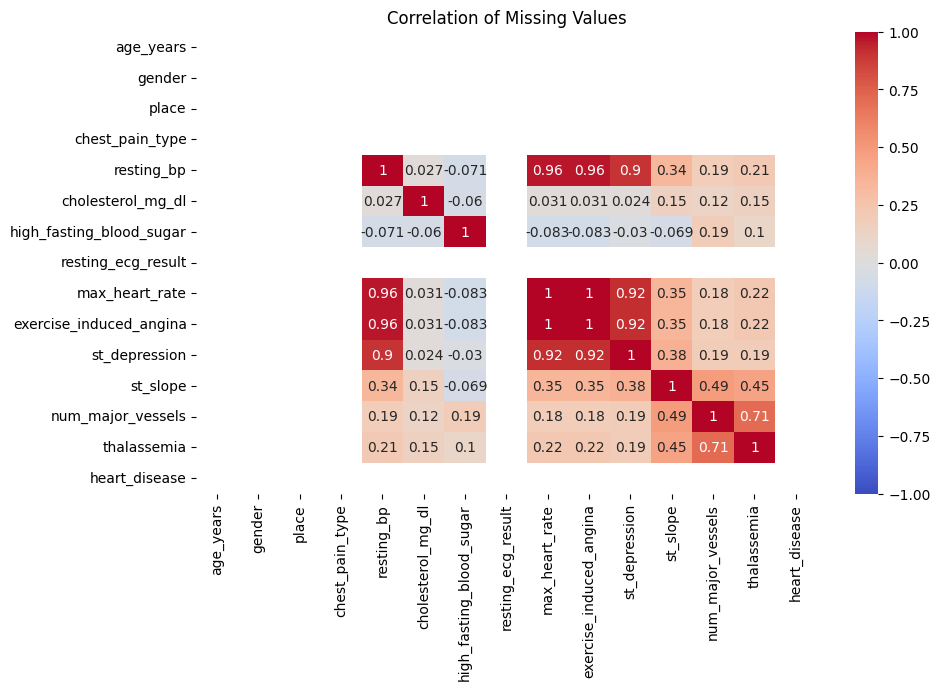

In [43]:
missingness = df.isnull().astype(int)

# Calculate the correlation matrix
correlation_matrix = missingness.corr()

# Create a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", vmin=-1, vmax=1, center=0)
plt.title("Correlation of Missing Values")
plt.show()


<span style="color: green; font-size: 250%; font-weight: bold;">5.2 | Percentage of Null Values</span>

In [44]:
# calculate the percentage of null values in each column
null_percentage = (df.isnull().sum().sort_values(ascending=False) / len(df)) * 100

# round the percentage to 2 decimal places
null_percentage = null_percentage.round(2)

# print the percentage of null values
print("Percentage of null values:\n", null_percentage)

Percentage of null values:
 num_major_vessels           66.34
thalassemia                 52.72
st_slope                    33.55
high_fasting_blood_sugar     9.69
st_depression                6.75
resting_bp                   6.43
max_heart_rate               5.99
exercise_induced_angina      5.99
cholesterol_mg_dl            3.27
gender                       0.00
place                        0.00
chest_pain_type              0.00
age_years                    0.00
resting_ecg_result           0.00
heart_disease                0.00
dtype: float64



<span style="color: green; font-size: 250%; font-weight: bold;">5.3 | Columns of Missing Values</span>


In [45]:
# print missing data columns
df.isnull().sum()[df.isnull().sum() > 0].sort_values(ascending=False)
missing_data_cols = df.isnull().sum()[df.isnull().sum() > 0].index.tolist()
print("missing_data_cols",missing_data_cols)
print("----------------------------------------------")
#  print  numerical columns who have missing values
numerical_columns = df.select_dtypes(include='number').columns
missing_numerical_columns = df[numerical_columns].isnull().sum()
missing_numerical_columns = missing_numerical_columns[missing_numerical_columns > 0]
print("Numerical columns with missing values:")
for column in missing_numerical_columns.index:
    print(column)
print("----------------------------------------------")
# Print categorical columns who have missing values
categorical_columns = df.select_dtypes(include='object').columns
missing_categorical_columns = df[categorical_columns].isnull().sum()
missing_categorical_columns = missing_categorical_columns[missing_categorical_columns > 0]
print("Categorical columns with missing values:")
for column in missing_categorical_columns.index:
    print(column)
    

missing_data_cols ['resting_bp', 'cholesterol_mg_dl', 'high_fasting_blood_sugar', 'max_heart_rate', 'exercise_induced_angina', 'st_depression', 'st_slope', 'num_major_vessels', 'thalassemia']
----------------------------------------------
Numerical columns with missing values:
resting_bp
cholesterol_mg_dl
max_heart_rate
st_depression
num_major_vessels
----------------------------------------------
Categorical columns with missing values:
high_fasting_blood_sugar
exercise_induced_angina
st_slope
thalassemia


* Here `10` columns have null values: `resting_bp`, `cholesterol_mg_dl`, `high_fasting_blood_sugar`, `resting_ecg_result`, `max_heart_rate`, `exercise_induced_angina`, `st_depression`, `st_slope`, `num_major_vessels`, `thalassemia`
* ***Categorical columns with missing values:*** `high_fasting_blood_sugar`, `resting_ecg_result`, `exercise_induced_angina`, `st_slope`, `thalassemia`
* ***Numerical columns with missing values:*** `resting_bp`, `cholesterol_mg_dl`, `max_heart_rate`, `st_depression`, `num_major_vessels`




 
<span style="color: green; font-size: 250%; font-weight: bold;"> 5.4 | Impute Missing Values </span>


### Categorical with mode and Numrical with mean

In [46]:
missing_numerical_columns=(list(missing_numerical_columns.index))


In [47]:
missing_categorical_columns = list(missing_categorical_columns.index)

In [48]:
def fill_nan_with_mean_n(c):
    df[c].fillna(df[c].mean(),inplace=True)
    
for c in missing_numerical_columns :
    fill_nan_with_mean_n(c)

In [49]:
def fill_nan_with_mean_c(c):
    df[c].fillna(df[c].mode()[0],inplace=True)
    
for c in missing_categorical_columns :
    fill_nan_with_mean_c(c)

In [50]:
df.isna().sum()

age_years                   0
gender                      0
place                       0
chest_pain_type             0
resting_bp                  0
cholesterol_mg_dl           0
high_fasting_blood_sugar    0
resting_ecg_result          0
max_heart_rate              0
exercise_induced_angina     0
st_depression               0
st_slope                    0
num_major_vessels           0
thalassemia                 0
heart_disease               0
dtype: int64

In [51]:
categorical_cols_new = [
    'st_slope',
    'exercise_induced_angina',
    'resting_ecg_result',
    'high_fasting_blood_sugar',
    'chest_pain_type',
    'gender',
    'heart_disease',
    'thalassemia'
]

bool_cols_new = [
    'high_fasting_blood_sugar',
    'exercise_induced_angina'
]

numeric_cols_new = [
    'st_depression',
    'max_heart_rate',
    'cholesterol_mg_dl',
    'resting_bp',
    'age_years',
    'num_major_vessels'
]


In [52]:
df.head()

,age_years,gender,place,chest_pain_type,resting_bp,cholesterol_mg_dl,high_fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,st_slope,num_major_vessels,thalassemia,heart_disease
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0


<Axes: >

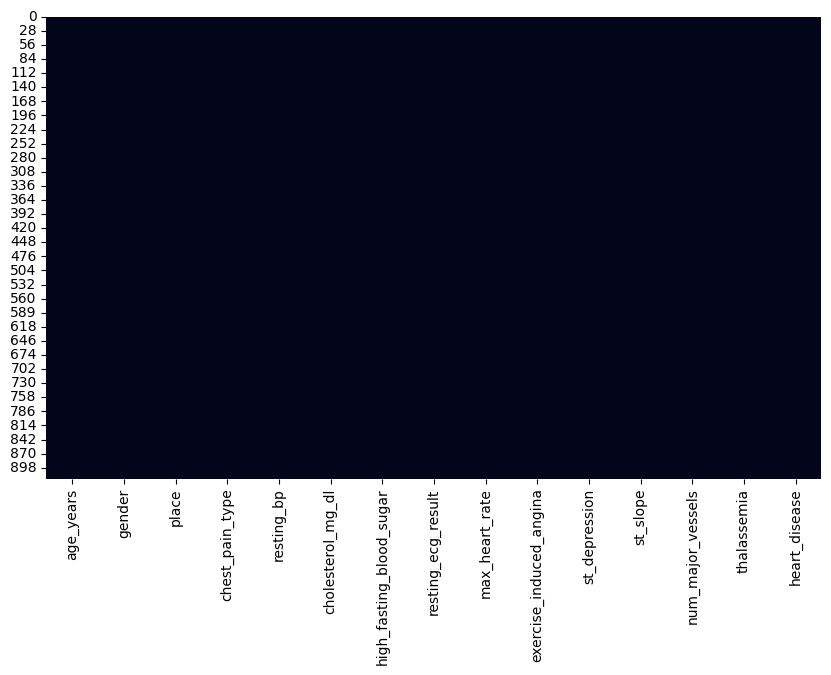

In [53]:

plt.figure( figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False)


>* After applying the function all missing values imputed.

<a id="outlier"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:125%; text-align:center; ;">Step 6 | Outliers</p>

>* Techniques  for identify the Outliers in the dataset  here used only `2` Techniques \
1 . IQR method\
2 . Graphical Technique(box plot)



 <span style="color: green; font-size: 250%; font-weight: bold;"> 6.1 | Check Outliers with Graphical Technique</span>

>* Here we use ***Boxplot*** to check the outliers in the dataset\
>* ***`NOTE :`*** Always outliers check in Numerical columns 

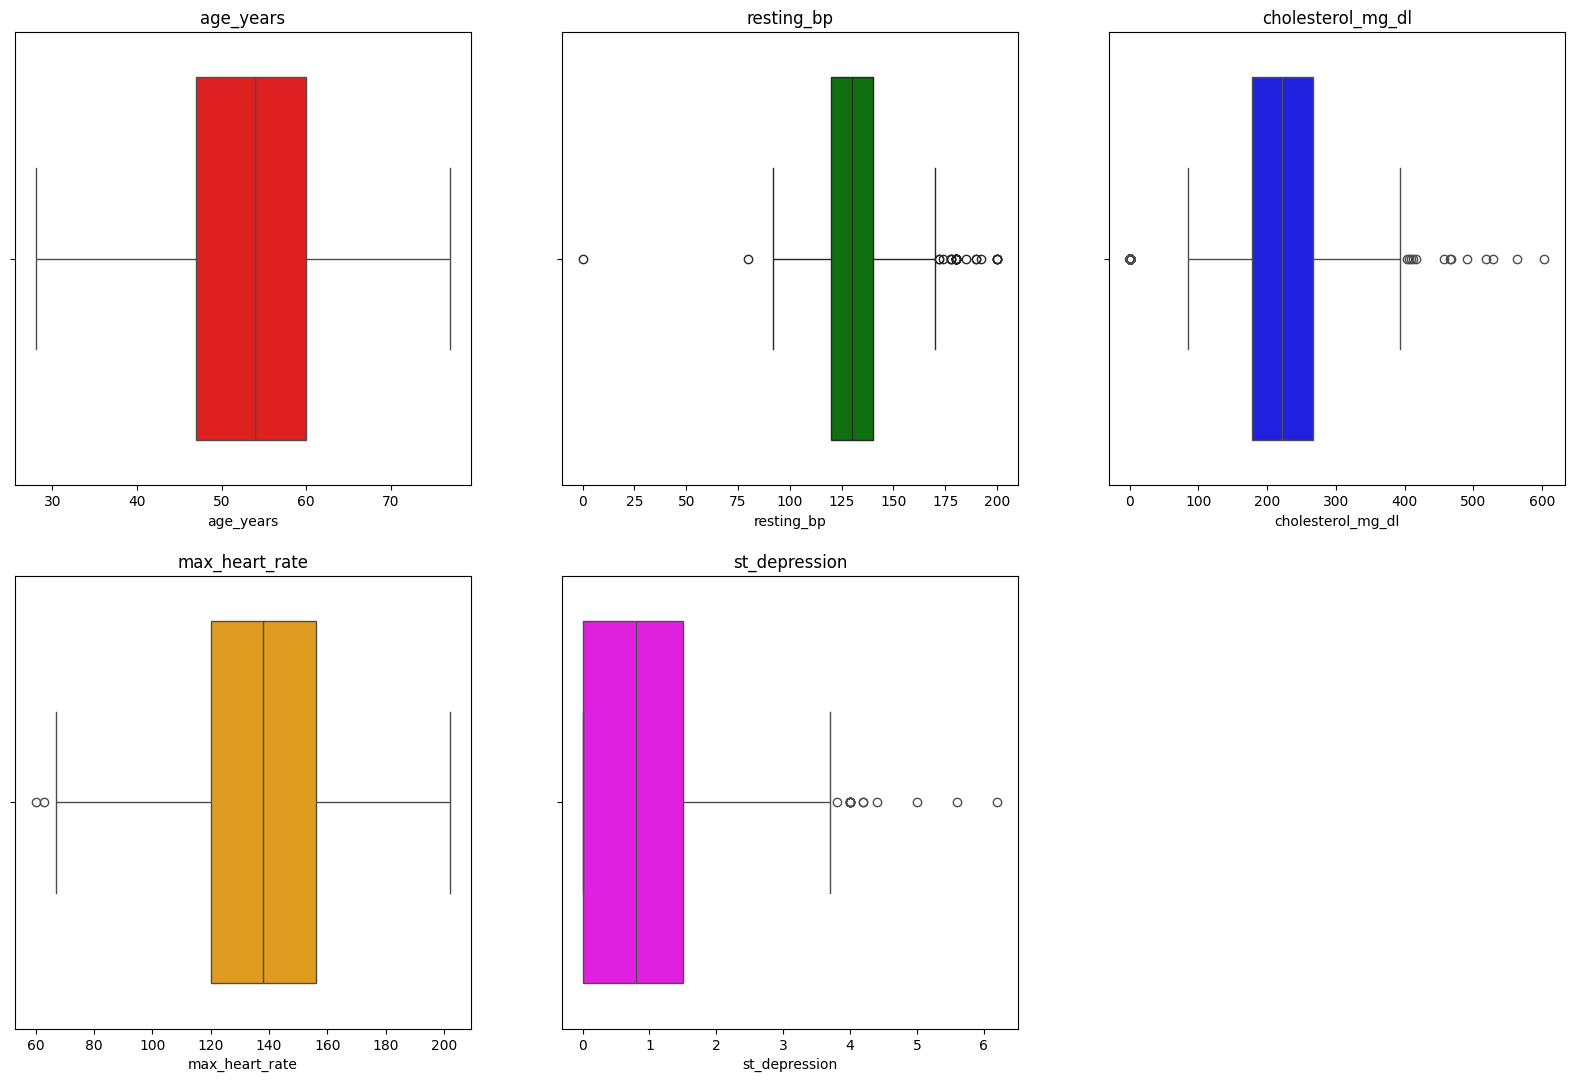

In [54]:
plt.figure(figsize=(20, 20))

colors = ['red', 'green', 'blue', 'orange', 'magenta']

# Assuming numeric_cols is a list of numeric column names
for i, col in enumerate(numeric_cols):
    if i < len(colors):  # Check if the index is within the range of colors
        plt.subplot(3, 3, i+1)
        sns.boxplot(x=df[col], color=colors[i])
        plt.title(col)
    else:
        break  # Exit the loop if there are no more colors available

plt.show()

 <span style="color: green; font-size: 250%; font-weight: bold;">6.2 | Check Outliers with IQR Method</span>

In [55]:

# check number outliers in numeric_cols using IQR
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers_count_specified = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()

outliers_count_specified

age_years              0
resting_bp            28
cholesterol_mg_dl    184
max_heart_rate         2
st_depression         15
num_major_vessels    309
heart_disease          0
dtype: int64

> Upon identifying outliers for the specified numeric_cols, we found the following:

* `oldpeak :`     3 outliers
* `thalch :`      2 outlier
* `chol :`        185 outliers
* `trestbps :`    28 outliers
* `age :`         0 no outlier


 
  <span style="color: green; font-size: 250%; font-weight: bold;">6.3 | Deal with Outliers</span>

> Deal with Outliers ***`resting_bp`***
* ***`resting_bp`*** resting blood pressure (resting blood pressure (in mm Hg on admission to the hospital))
* Resting Blood Pressure cannot be zero
> Deal with Outliers ***`st_depression`***
* `st_depression`: ST depression induced by exercise relative to rest
> Deal with Outliers ***`thalch`***
* `max_heart_rate`: maximum heart rate achieved
> Deal with Outliers ***`cholesterol_mg_dl`***
* `cholesterol_mg_dl` (serum cholesterol in mg/dl)


<span style="color: green; font-size: 125%; font-weight: bold;">resting_bp </span>

>* There are some zero values in the column `trestbps` so Blood Pressure  can never be `0`

In [56]:
df['resting_bp'].describe()

count    918.000000
mean     132.143190
std       18.453496
min        0.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: resting_bp, dtype: float64

In [57]:

# remove rows with values less than 80 in the 'trestbps' column
df = df[df['resting_bp'] >= 80]


>* Blood Pressure cannot be `0` so this remove from the data
>* Graphical method show outlier but the these are not outliers because according to the data the blood pressure can be high
>* Greater than `120` the blood pressure is high and less than `80` is low


In [58]:
df['place'].value_counts()

place
Cleveland        304
Hungary          292
VA Long Beach    199
Switzerland      122
Name: count, dtype: int64

<span style="color: green; font-size: 125%; font-weight: bold;">max_heart_rate </span>

>* In ***`max_heart_rate`*** column values can be start `71` so removed less than `71`


In [59]:
# remove rows with values less than 71 in the 'thalch' column
df = df[df['max_heart_rate'] >= 71]

In [60]:
df['max_heart_rate'].describe()

count    912.000000
mean     137.902480
std       24.665814
min       71.000000
25%      120.000000
50%      138.000000
75%      156.000000
max      202.000000
Name: max_heart_rate, dtype: float64

<span style="color: green; font-size: 125%; font-weight: bold;">st_depression</span>

>* In the `st_depression` column are `3` outliers

In [61]:

# remove outliers in 'oldpeak' column
Q1 = df['st_depression'].quantile(0.25)
Q3 = df['st_depression'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df=df[(df['st_depression'] >= lower_bound) & (df['st_depression'] <= upper_bound)]


<span style="color: green; font-size: 125%; font-weight: bold;">cholesterol_mg_dl ( Cholesterol )</span>

>* There are some zero values in the column `cholestrol` so cholestrol can never be `0`
>* Here are `168` zero values in `chol` column

In [62]:
# print the row from df where chol value is 0
print("zero_counts :",(df['cholesterol_mg_dl'] == 0).sum())
# remove this row from data
df = df[df['cholesterol_mg_dl'] != 0]

zero_counts : 166


>* The values of chol cannot be zero
>* Count the cholestrol values between `126` to `400` other removed

In [63]:
# remove values less than 126
df = df[df['cholesterol_mg_dl'] >= 126]
# remove values greater than 400
df = df[df['cholesterol_mg_dl'] <= 400]

<a id="miss"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:125%; text-align:center; ;">Step 7 |Feature Engineering </p>

### Creating Age Groups (Tranches d'âge)

### Categories:
- **0-20 years**  
- **20-40 years**  
- **40-60 years**  
- **60+ years**  

In [64]:
# Create age groups using pandas
bins = [0, 20, 40, 60, 120]
labels = ["0-20", "20-40", "40-60", "60+"]
df["age_group"] = pd.cut(df["age_years"], bins=bins, labels=labels)

### Visualization:



<Axes: xlabel='age_group'>

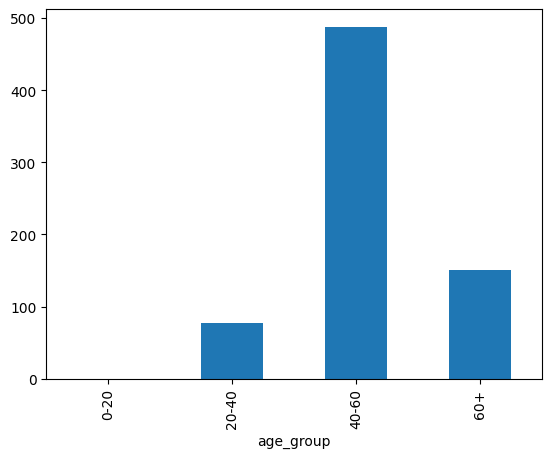

In [65]:
df["age_group"].value_counts().sort_index().plot(kind="bar")

### * Feature Engineering: Age-Group Interactions

### Existing Numerical Features:
- `st_depression`  
- `max_heart_rate`  
- `cholesterol_mg_dl`  
- `resting_bp`  
- `age_years`  

### New Interaction Features:


**ST Depression by Age Group**  


In [66]:
df['st_depression_by_age_group'] = df['st_depression'] / df.groupby('age_group')['st_depression'].transform('mean')

### Max Heart Rate Relative to Age Norm



In [67]:
df['heart_rate_age_ratio'] = df['max_heart_rate'] / (220 - df['age_years'])  # Using theoretical max HR formula

### Cholesterol-to-Age-Group-Mean



In [68]:
df['chol_age_adjusted'] = df['cholesterol_mg_dl'] - df.groupby('age_group')['cholesterol_mg_dl'].transform('mean')

### Blood Pressure Percentile by Age



In [69]:
df['bp_age_percentile'] = df.groupby('age_group')['resting_bp'].rank(pct=True)

<Axes: xlabel='age_group', ylabel='st_depression_by_age_group'>

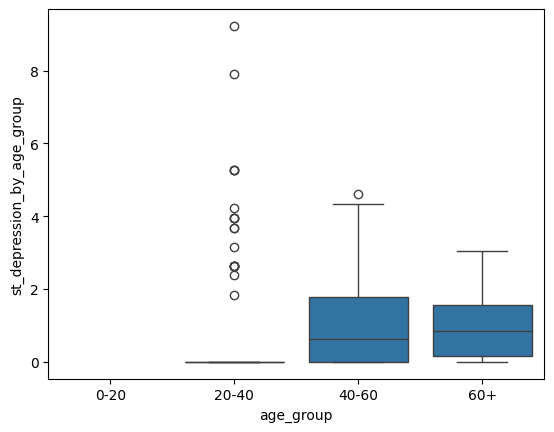

In [70]:
# Check feature distributions by age group
import seaborn as sns
sns.boxplot(x='age_group', y='st_depression_by_age_group', data=df)

While the central tendency of ST depression is relatively stable across age groups, the variability and presence of outliers—particularly in middle-aged adults (40-60)—may indicate age-specific health variations that warrant further investigation.

# Chest Pain Type-Adjusted Numerical Features

### 1. Base Numerical Features
- `st_depression`
- `max_heart_rate` 
- `cholesterol_mg_dl`
- `resting_bp`
- `age_years`

### 2. Transformation Strategy
For each numerical feature, create three clinically meaningful variants:

### 2.1 Mean-Normalized by CP Type


In [71]:
# List of numerical features
numerical_features = [
    'st_depression',
    'max_heart_rate',
    'cholesterol_mg_dl', 
    'resting_bp',
    'age_years'
]

# Create all transformations
for feature in numerical_features:
    # Mean-normalized
    df[f'{feature}_cp_norm'] = df[feature] / df.groupby('chest_pain_type')[feature].transform('mean')
    
    # Median difference
    df[f'{feature}_cp_diff'] = df[feature] - df.groupby('chest_pain_type')[feature].transform('median')
    
    # Percentile rank
    df[f'{feature}_cp_rank'] = df.groupby('chest_pain_type')[feature].rank(pct=True)

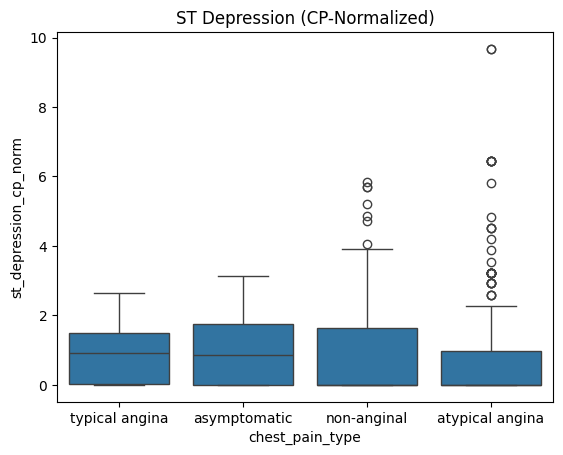

In [72]:
# Check feature distributions
for feature in numerical_features:
    df[[f'{feature}_cp_norm', f'{feature}_cp_diff', f'{feature}_cp_rank']].describe()
    
# Visualize one example
import seaborn as sns
sns.boxplot(x='chest_pain_type', y='st_depression_cp_norm', data=df)
plt.title('ST Depression (CP-Normalized)')
plt.show()

### Interpretation:
ST depression varies significantly with chest pain type, especially for atypical angina, which shows both low median and a long tail of high outliers.

This suggests that chest pain type could be an informative feature in predicting or understanding ST depression patterns in cardiac patients.

The normalization step seems to have amplified differences, which may help downstream models focus on relevant feature variation.

### Skewness

In [73]:
from scipy.stats import skew

def analyze_and_transform_skewness(df, numerical_features, skew_threshold=0.5):
    """
    Analyzes skewness of numerical features and applies log transformation 
    when absolute skewness exceeds the threshold.
    
    Parameters:
    - df: DataFrame containing the data
    - numerical_features: List of numerical column names to analyze
    - skew_threshold: Absolute skewness value above which transformation is applied (default=0.5)
    
    Returns:
    - Transformed DataFrame
    - Dictionary of skewness values (before and after)
    """
    
    # 1. Initialize results storage
    skew_results = {
        'original_skew': {},
        'transformed_skew': {},
        'transformed_features': []
    }
    
    # 2. Create copy to avoid modifying original dataframe
    df_transformed = df.copy()
    
    # 3. Analyze each feature
    for feature in numerical_features:
        # Calculate original skewness
        original_skew = skew(df[feature].dropna())
        skew_results['original_skew'][feature] = original_skew
        
        # Apply transformation if skewness exceeds threshold
        if abs(original_skew) > skew_threshold:
            # Handle zero/negative values by adding constant
            if df[feature].min() <= 0:
                offset = abs(df[feature].min()) + 1
                df_transformed[f'log_{feature}'] = np.log(df[feature] + offset)
            else:
                df_transformed[f'log_{feature}'] = np.log(df[feature])
                
            # Store transformation results
            transformed_skew = skew(df_transformed[f'log_{feature}'].dropna())
            skew_results['transformed_skew'][feature] = transformed_skew
            skew_results['transformed_features'].append(feature)
            
            # Plot comparison
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            sns.histplot(df[feature], kde=True)
            plt.title(f'Original {feature}\nSkew: {original_skew:.2f}')
            
            plt.subplot(1, 2, 2)
            sns.histplot(df_transformed[f'log_{feature}'], kde=True)
            plt.title(f'Transformed log_{feature}\nSkew: {transformed_skew:.2f}')
            
            plt.tight_layout()
            plt.show()
        else:
            skew_results['transformed_skew'][feature] = None
    
    # 4. Print summary
    print("="*50)
    print("Skewness Analysis Summary:")
    print(f"Applied log transform to {len(skew_results['transformed_features'])}/{len(numerical_features)} features")
    print("="*50)
    
    skew_df = pd.DataFrame({
        'Feature': numerical_features,
        'Original Skew': [skew_results['original_skew'][f] for f in numerical_features],
        'Transformed Skew': [skew_results['transformed_skew'][f] for f in numerical_features],
        'Transformed?': ['Yes' if f in skew_results['transformed_features'] else 'No' for f in numerical_features]
    })
    
    print(skew_df.sort_values(by='Original Skew', key=lambda x: x.abs(), ascending=False))
    
    return df_transformed, skew_results

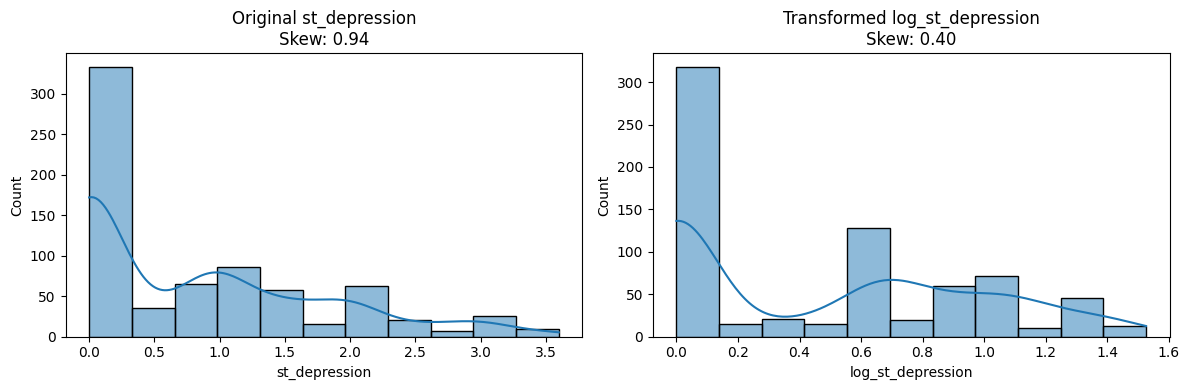

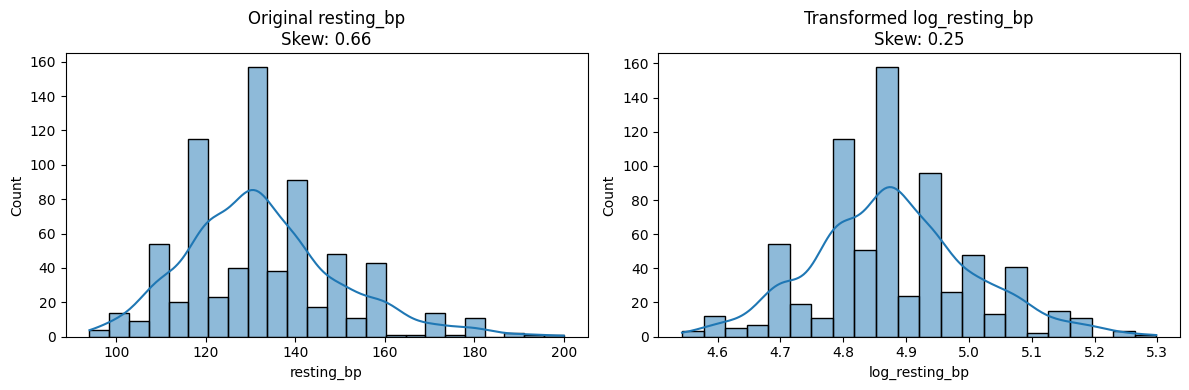

Skewness Analysis Summary:
Applied log transform to 2/5 features
             Feature  Original Skew  Transformed Skew Transformed?
0      st_depression       0.942589          0.403419          Yes
3         resting_bp       0.655243          0.249360          Yes
2  cholesterol_mg_dl       0.480359               NaN           No
1     max_heart_rate      -0.209592               NaN           No
4          age_years      -0.086892               NaN           No


In [74]:
numerical_features = ['st_depression', 'max_heart_rate', 'cholesterol_mg_dl', 'resting_bp', 'age_years']
df_transformed, skew_results = analyze_and_transform_skewness(df, numerical_features)


In [75]:
df_transformed.head()

,age_years,gender,place,chest_pain_type,resting_bp,cholesterol_mg_dl,high_fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,...,cholesterol_mg_dl_cp_diff,cholesterol_mg_dl_cp_rank,resting_bp_cp_norm,resting_bp_cp_diff,resting_bp_cp_rank,age_years_cp_norm,age_years_cp_diff,age_years_cp_rank,log_st_depression,log_resting_bp
0,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,...,-0.5,0.500000,1.064411,9.0,0.710526,1.141087,4.0,0.736842,1.193922,4.976734
1,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,...,45.0,0.776012,1.195341,28.0,0.919075,1.225005,12.0,0.933526,0.916291,5.075174
2,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,...,-12.0,0.426301,0.896506,-12.0,0.205202,1.225005,12.0,0.933526,1.280934,4.787492
3,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,...,26.0,0.691617,0.992133,0.0,0.461078,0.706656,-15.0,0.047904,1.504077,4.867534
4,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,...,-33.0,0.275758,0.997085,0.0,0.563636,0.840895,-9.0,0.215152,0.875469,4.867534


### Encoding

In [76]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder

def encode_features(df):
    # 1. One-hot encode 'gender'
    df = pd.get_dummies(df, columns=['gender'], drop_first=True)

    # 2. Ordinal/categorical encoding
    ordinal_features = ['chest_pain_type', 'thalassemia', 'resting_ecg_result']
    ordinal_encoder = OrdinalEncoder()
    df[ordinal_features] = ordinal_encoder.fit_transform(df[ordinal_features])

    # 3. Binary encoding for 'exercise_induced_angina'
    # Ensure values are only 0 and 1
    df['exercise_induced_angina'] = df['exercise_induced_angina'].apply(lambda x: 1 if x in [1, 'yes', 'true', True] else 0)

    return df
df_encoded = encode_features(df_transformed)


<a id="ml"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:125%; text-align:center; ;">Step 8 | Statistical tests</p>

## Independent Samples T-Test: Cholesterol Levels by Gender

We conducted an independent two-sample t-test to determine whether there is a statistically significant difference in mean cholesterol levels between male and female participants.

**Test Description:**
- **Null Hypothesis (H₀):** There is no difference in mean cholesterol levels between males and females (μ₁ = μ₂).
- **Alternative Hypothesis (H₁):** There is a difference in mean cholesterol levels between males and females (μ₁ ≠ μ₂).

**Assumptions:**
- The two groups are independent.
- The data within each group is approximately normally distributed.
- The variances are assumed to be equal (or the test is robust to unequal variances if `equal_var=False` is specified).

**Test Used:**
- `scipy.stats.ttest_ind` (independent samples t-test)

**Results:**
- t-statistic: *t = -2.4224*
- p-value: *p = 0.0157*

**Interpretation:**
- If the p-value is less than the significance level (e.g., α = 0.05), we reject the null hypothesis and conclude that there is a significant difference in cholesterol levels between males and females.


In [77]:

male_chol = df[df['gender'] == 'Male']['cholesterol_mg_dl']
female_chol = df[df['gender'] == 'Female']['cholesterol_mg_dl']
t_stat, p_value = ttest_ind(male_chol, female_chol)
print(f"T-test: t={t_stat:.4f}, p={p_value:.4f}")


T-test: t=-2.4224, p=0.0157


### 🎯 Conclusion:

- **Significance Level (α):** 0.05
- Since **p = 0.0157 < 0.05**, we **reject the null hypothesis**.

### 📌 Interpretation:

There is a statistically significant difference in mean cholesterol levels between males and females.  
Given the negative t-statistic, this suggests that **males have a significantly lower average cholesterol level than females** in this dataset.



## 🔍 Chi-Square Test of Independence: Gender vs Heart Disease

**Test Goal:**  
To determine whether there is a statistically significant association between **gender** and **heart disease status**.

**Test Used:**  
Chi-square test of independence using a contingency table.

**Hypotheses:**
- **Null Hypothesis (H₀):** Gender and heart disease status are independent.
- **Alternative Hypothesis (H₁):** There is an association between gender and heart disease status.

**Results:**
- **Chi-square statistic:** 64.5037  
- **p-value:** 0.0000 (rounded to 4 decimal places)

### ✅ Conclusion:

- **Significance Level (α):** 0.05  
- Since **p = 0.0000 < 0.05**, we **reject the null hypothesis**.

### 📌 Interpretation:

There is a **statistically significant association** between **gender** and **heart disease** in the dataset.  
This suggests that heart disease occurrence **varies by gender**, and gender may be related to the likelihood of having heart disease.



In [78]:
contingency = pd.crosstab(df['gender'], df['heart_disease'])
chi2, p, dof, expected = chi2_contingency(contingency)
print(f"Chi-square test: chi2={chi2:.4f}, p={p:.4f}")


Chi-square test: chi2=64.5037, p=0.0000


## 🧪 One-Way ANOVA: Cholesterol Levels Across Age Groups

**Test Goal:**  
To determine whether there are statistically significant differences in **mean cholesterol levels** between different **age groups**.

**Age Groups Compared:**
- 30–40 years
- 41–50 years
- 51–60 years
- 61–77 years

**Test Used:**  
One-way ANOVA (`scipy.stats.f_oneway`)

**Hypotheses:**
- **Null Hypothesis (H₀):** All age groups have the same mean cholesterol level.
- **Alternative Hypothesis (H₁):** At least one age group has a different mean cholesterol level.

**Results:**
- **F-statistic:** 2.6714  
- **p-value:** 0.0465

### ✅ Conclusion:

- **Significance Level (α):** 0.05  
- Since **p = 0.0465 < 0.05**, we **reject the null hypothesis**.

### 📌 Interpretation:

There is a **statistically significant difference** in mean cholesterol levels among the age groups.  
At least one age group differs in average cholesterol level from the others.



In [79]:

df['age_group'] = pd.cut(df['age_years'], bins=[29, 40, 50, 60, 77], labels=["30-40", "41-50", "51-60", "61-77"])
groups = [group['cholesterol_mg_dl'].values for name, group in df.groupby('age_group')]
f_stat, p_value = f_oneway(*groups)
print(f"One-way ANOVA: F={f_stat:.4f}, p={p_value:.4f}")


One-way ANOVA: F=2.6714, p=0.0465


<a id="ml"></a>
# <p style="background-color:green; font-family:calibri; color:white; font-size:125%; text-align:center; ;">Step 9 | Machine Learning</p>

In [ ]:
df_encoded.head()

,age_years,place,chest_pain_type,resting_bp,cholesterol_mg_dl,high_fasting_blood_sugar,resting_ecg_result,max_heart_rate,exercise_induced_angina,st_depression,...,cholesterol_mg_dl_cp_rank,resting_bp_cp_norm,resting_bp_cp_diff,resting_bp_cp_rank,age_years_cp_norm,age_years_cp_diff,age_years_cp_rank,log_st_depression,log_resting_bp,gender_Male
0,63,Cleveland,3.0,145.0,233.0,True,0.0,150.0,0,2.3,...,0.500000,1.064411,9.0,0.710526,1.141087,4.0,0.736842,1.193922,4.976734,True
1,67,Cleveland,0.0,160.0,286.0,False,0.0,108.0,1,1.5,...,0.776012,1.195341,28.0,0.919075,1.225005,12.0,0.933526,0.916291,5.075174,True
2,67,Cleveland,0.0,120.0,229.0,False,0.0,129.0,1,2.6,...,0.426301,0.896506,-12.0,0.205202,1.225005,12.0,0.933526,1.280934,4.787492,True
3,37,Cleveland,2.0,130.0,250.0,False,1.0,187.0,0,3.5,...,0.691617,0.992133,0.0,0.461078,0.706656,-15.0,0.047904,1.504077,4.867534,True
4,41,Cleveland,1.0,130.0,204.0,False,0.0,172.0,0,1.4,...,0.275758,0.997085,0.0,0.563636,0.840895,-9.0,0.215152,0.875469,4.867534,False



 
  <span style="color: green; font-size: 250%; font-weight: bold;">9.1 | Encoded the Data</span>

>* Encode the categorical feature : place by ***`LabelEncoder`***

In [81]:
#  # apply labelencoder on Cleveland column 

df_encoded['place'] =LabelEncoder().fit_transform(df_encoded['place'])
df_encoded['age_group'] =LabelEncoder().fit_transform(df_encoded['age_group'])


In [82]:
# Define the ordinal mapping
slope_mapping = {
    'upsloping': 0,
    'flat': 1,
    'downsloping': 2
}

# Apply the mapping to the column
df_encoded['st_slope'] = df_encoded['st_slope'].replace(slope_mapping)


In [83]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 716 entries, 0 to 919
Data columns (total 37 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   age_years                   716 non-null    int64  
 1   place                       716 non-null    int64  
 2   chest_pain_type             716 non-null    float64
 3   resting_bp                  716 non-null    float64
 4   cholesterol_mg_dl           716 non-null    float64
 5   high_fasting_blood_sugar    716 non-null    bool   
 6   resting_ecg_result          716 non-null    float64
 7   max_heart_rate              716 non-null    float64
 8   exercise_induced_angina     716 non-null    int64  
 9   st_depression               716 non-null    float64
 10  st_slope                    716 non-null    int64  
 11  num_major_vessels           716 non-null    float64
 12  thalassemia                 716 non-null    float64
 13  heart_disease               716 non-null

<span style="color: green; font-size: 250%; font-weight: bold;">9.2 | Feature Selection</span>

In [84]:
features =[]

<span style="color: green; font-size: 250%; font-weight: bold;">9.3 | Split the Data into X and y</span>

In [85]:
# split data into X and y
X = df_encoded.drop('heart_disease', axis=1)
y = df_encoded['heart_disease']
# data into train and split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


<span style="color: green; font-size: 250%; font-weight: bold;">9.3 | Select the Best Model</span>

>Enlist some  models that use to predict the heart disease. These models should be classifiers for multi-class classification.

1. logistic regression
2. SVM
3. Decision Tree
4. Random Forest
5. XGBoost
6. AdaBoost


In [86]:
models = [
    ('Random Forest', RandomForestClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__max_depth': [None, 10, 20]}),  # Add hyperparameters for Random Forest
    ('Gradient Boosting', GradientBoostingClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Gradient Boosting
    ('Support Vector Machine', SVC(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__gamma': ['scale', 'auto']}),  # Add hyperparameters for SVM
    ('Logistic Regression', LogisticRegression(random_state=42, class_weight='balanced'),
        {'model__C': [0.1, 1, 10],
         'model__penalty': ['l1', 'l2']}),  # Add hyperparameters for Logistic Regression
    ('Decision Tree', DecisionTreeClassifier(random_state=42),
        {'model__max_depth': [None, 10, 20],
         'model__min_samples_split': [2, 5, 10]}),  # Add hyperparameters for Decision Tree
    ('Ada Boost', AdaBoostClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for Ada Boost
    ('XG Boost', XGBClassifier(random_state=42),
        {'model__n_estimators': [50, 100, 200],
         'model__learning_rate': [0.05, 0.1, 0.5]}),  # Add hyperparameters for XG Boost
]


In [ ]:
best_model = None
best_accuracy = 0.0
best_model_name=""
# Iterate over the models and evaluate their performance
for name, model, param_grid in models:
    # Create a pipeline for each model
    pipeline = Pipeline([
        ('scaler', MinMaxScaler()),  # Feature Scaling
        ('model', model)
    ])

    # Hyperparameter tuning using GridSearchCV
    if param_grid:
        grid_search = GridSearchCV(pipeline, param_grid, cv=5)
        grid_search.fit(X_train, y_train)
        pipeline = grid_search.best_estimator_
    else:
        pipeline.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy score
    accuracy = accuracy_score(y_test, y_pred)

    # Print the performance metrics
    print("Model:", name)
    print("Test Accuracy:", accuracy)
    print()

    # Check if the current model has the best accuracy
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_model = pipeline
        best_model_name=name

# Retrieve the overall best model
print("Test Accuracy:", best_accuracy)

# Affichage textuel explicite sans "carré"
print("Model Pipeline steps:")
for step_name, step_obj in best_model.steps:
    print(f" - {step_name}: {step_obj}")


Model: Random Forest
Test Accuracy: 0.586046511627907

Model: Gradient Boosting
Test Accuracy: 0.5674418604651162

Model: Support Vector Machine
Test Accuracy: 0.5627906976744186

Model: Logistic Regression
Test Accuracy: 0.5209302325581395

Model: Decision Tree
Test Accuracy: 0.5627906976744186



>* The best Model is ***`XG Boost`***